# Generating Stress/Strain data using Integration - and actually outputting the data for use in DeepMoD

I will use the functions previously developed and stored within //data/Generation/VE_DataGen_Functions to generate data sets for a variety of inputs. I will then save this output data to //data as .csv files, ready to imported into another notebook where i will use DeepMod on the results.

The workflow for data generation will be to first attempt an analytical result, and if this has not worked after a few minutes, then I will abort and try the numerical result. I suspect the step function will not work with a numerical method because of a bug in the `sp.lambdify` function, but it should hopefully work analytically anyway. In contrast, the rest may need to be done numerically.

I can vary:

- The Input Type

- The Input functional form

- The size of the model

- The parameters of the model

## The Heaviside step input - Stress Input

I will, start off very simply, a Strain input, a step input, a basic model with only 1 viscosity, and all parameters = to 1.

In [1]:
import os
import numpy as np
import sympy as sp
import sys

sys.path.append('../')
import data.Generation.VE_DataGen_Functions as vedg

In [2]:
Input_Type = 'Strain'
E = [1, 1]
Eta = [1]
t = sp.symbols('t', real=True)
#Input_Function = sp.Heaviside(t, 0) # the second arguement specifies that H(0) = 0, not 1, not 0.5, and not undefined.
Input_Function = sp.S(1)
Input_Description = 'Step'
Int_Type = 'Analytical'

Tuple_of_Expressions = vedg.Stress_Strain_Master_Int(Input_Type, E, Eta, Input_Function, Int_Type, t)
print(Tuple_of_Expressions)

1.0 + 1.0*exp(-t)


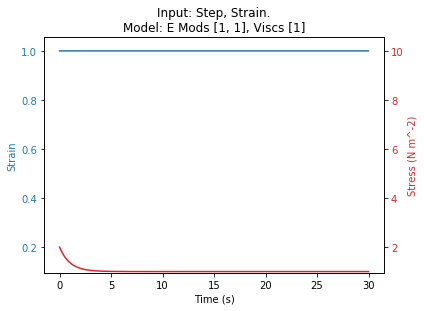

In [3]:
time = np.linspace(0, 30, 5000)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: E Mods ' + str(E) + ', Viscs ' + str(Eta))

Strain_Array, Stress_Array = vedg.Eval_Graph_Strain_Stress(title, time, Input_Function, Tuple_of_Expressions, Input_Type, Int_Type, t)

Now we have some new code for saving the data in a proper format. First it must be reshaped into columns. this is partly a choice, I could export it as two different files, but it makes sense to store the data together, and it makes it easier to name. I establish the convention that the 1st column is always strain. It could also have been rows but column is more normal.

In [4]:
time = time.reshape(-1, 1)
Strain_Array = Strain_Array.reshape(-1, 1)
Stress_Array = Stress_Array.reshape(-1, 1)
Data_Export = np.concatenate((time, Strain_Array, Stress_Array), axis=1)
print(Data_Export.shape)

(5000, 3)


In [6]:
if not os.path.isdir('../data/StressStrain'):
    os.makedirs('../data/StressStrain')

In [10]:
Filename = Input_Type + ' ' + Input_Description + ' E' + str(E) + ' V' + str(Eta)
np.savetxt('../data/StressStrain/'+Filename+'.csv', Data_Export, delimiter=',')

Collecting te ideas above into a function, teh below is written. This is now present in the src code file as a callable function also.

In [4]:
def save_stress_strain(time, Strain_Array, Stress_Array, Folder_Path, Input_Type, Input_Description, E_Mods, Viscs):
    
    time = time.reshape(-1, 1)
    Strain_Array = Strain_Array.reshape(-1, 1)
    Stress_Array = Stress_Array.reshape(-1, 1)
    
    Data_Export = np.concatenate((time, Strain_Array, Stress_Array), axis=1)
    
    if not os.path.isdir(Folder_Path):
        os.makedirs(Folder_Path)
    
    Filename = Input_Type + ' ' + Input_Description + ' E' + str(E_Mods) + ' V' + str(Viscs)
    np.savetxt(Folder_Path+'/'+Filename+'.csv', Data_Export, delimiter=',')

In [5]:
save_stress_strain(time, Strain_Array, Stress_Array, '../data/StressStrain', Input_Type, Input_Description, E, Eta)